In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [15]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [18]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


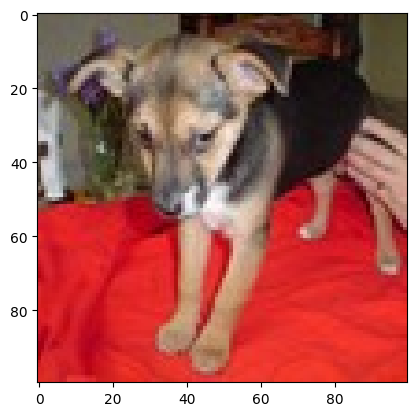

In [20]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 30s 826ms/step - loss: 0.7168 - accuracy: 0.5300
Epoch 2/5
32/32 [==============================] - 27s 844ms/step - loss: 0.6560 - accuracy: 0.6480
Epoch 3/5
32/32 [==============================] - 28s 875ms/step - loss: 0.5842 - accuracy: 0.7065
Epoch 4/5
32/32 [==============================] - 30s 935ms/step - loss: 0.5334 - accuracy: 0.7355
Epoch 5/5
32/32 [==============================] - 30s 928ms/step - loss: 0.4630 - accuracy: 0.7840


In [25]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 153ms/step - loss: 0.6393 - accuracy: 0.6625


[0.6392974257469177, 0.6625000238418579]

# Making predictions

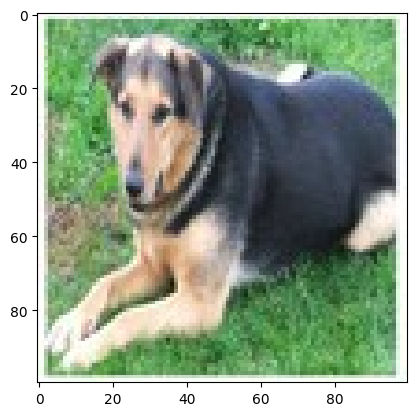

1/1 [==============================] - 0s 43ms/step
Our model says it is a : dog


In [31]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()#figsize(5,5)

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [32]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Backpropagation Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)
    
    def feedforward(self, X):
        # Input to hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        
        # Hidden to output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        
        return self.output
    
    def backpropagation(self, X, y, learning_rate):
        # Feedforward to get the predictions
        output = self.feedforward(X)
        
        # Calculate error (difference between prediction and true value)
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
        
        # Calculate hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)
        
        # Update the weights and biases using gradient descent
        self.weights_hidden_output += np.dot(self.hidden.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, learning_rate=0.1, epochs=10000):
        for epoch in range(epochs):
            self.backpropagation(X, y, learning_rate)
            
            # Optional: print loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = mse_loss(y, self.feedforward(X))
                print(f'Epoch {epoch}, Loss: {loss}')

# Example usage
if __name__ == "__main__":
    # Input data: X (4 samples with 2 features each)
    X = np.array([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]])

    # Output labels: y (XOR truth table)
    y = np.array([[0], 
                  [1], 
                  [1], 
                  [0]])

    # Create a neural network with 2 input neurons, 10 hidden neurons, and 1 output neuron
    nn = NeuralNetwork(input_size=2, hidden_size=10, output_size=1)

    # Train the network
    nn.train(X, y, learning_rate=0.1, epochs=10000)

    # Testing
    print("Final output after training:")
    print(nn.feedforward(X))


Epoch 0, Loss: 0.48591560770527886
Epoch 1000, Loss: 0.24440195839307555
Epoch 2000, Loss: 0.21537016903966907
Epoch 3000, Loss: 0.13265629629542497
Epoch 4000, Loss: 0.04323339809494009
Epoch 5000, Loss: 0.015518834883905583
Epoch 6000, Loss: 0.00793211632546988
Epoch 7000, Loss: 0.0049643246241694895
Epoch 8000, Loss: 0.0034881763157683003
Epoch 9000, Loss: 0.002635203335788379
Final output after training:
[[0.03986727]
 [0.95503581]
 [0.95423765]
 [0.051568  ]]
